In [61]:
# Import Important Libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

In [68]:
# Generate 1000 samples using normal function\
'''sample1 and sample2 are the two arrays containing the samples generated from normal distributions with different means (loc) 
and standard deviations (scale).'''
sample1=normal(loc=20, scale=5, size=300)
sample2=normal(loc=40,scale=5, size=700)
sample=np.hstack((sample1,sample2))

(array([ 1.,  1.,  2.,  1.,  5.,  2.,  5., 11.,  9., 16., 17., 18., 25.,
        24., 17., 15., 27., 22., 16., 18., 12., 12., 14., 14.,  5.,  6.,
        10., 16., 17., 20., 36., 32., 52., 50., 51., 49., 60., 55., 44.,
        47., 47., 24., 21., 18., 12.,  6., 11.,  5.,  1.,  1.]),
 array([ 5.11209869,  6.07981738,  7.04753607,  8.01525476,  8.98297345,
         9.95069214, 10.91841083, 11.88612952, 12.85384821, 13.8215669 ,
        14.78928559, 15.75700428, 16.72472297, 17.69244166, 18.66016035,
        19.62787904, 20.59559773, 21.56331642, 22.53103511, 23.4987538 ,
        24.4664725 , 25.43419119, 26.40190988, 27.36962857, 28.33734726,
        29.30506595, 30.27278464, 31.24050333, 32.20822202, 33.17594071,
        34.1436594 , 35.11137809, 36.07909678, 37.04681547, 38.01453416,
        38.98225285, 39.94997154, 40.91769023, 41.88540892, 42.85312761,
        43.8208463 , 44.78856499, 45.75628368, 46.72400237, 47.69172106,
        48.65943975, 49.62715844, 50.59487713, 51.56259582,

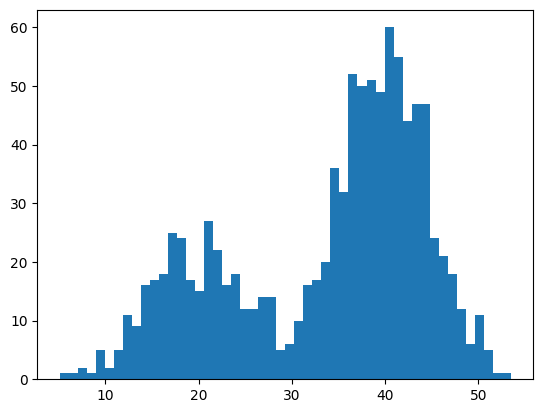

In [63]:
# plotting histogram spliting into 50 groups
plt.hist(sample,bins=50)

In [64]:
from sklearn.neighbors import KernelDensity

model=KernelDensity(bandwidth=1.5, kernel='gaussian')

# convert data to  a 2D array
sample=sample.reshape(len(sample),1)

model.fit(sample)

KernelDensity(bandwidth=1.5)

In this part of the code, we're using the `KernelDensity` estimator from scikit-learn to fit a kernel density estimation model to the data.

Here's what each part does:

1. `from sklearn.neighbors import KernelDensity`: This line imports the `KernelDensity` class from the `sklearn.neighbors` module. `KernelDensity` is a class that allows us to estimate probability densities using kernel density estimation.

2. `model = KernelDensity(bandwidth=1.5, kernel='gaussian')`: Here, we create an instance of the `KernelDensity` class. We specify the bandwidth of the kernel using the `bandwidth` parameter (in this case, 1.5) and the type of kernel to use (in this case, a Gaussian kernel) using the `kernel` parameter. 

3. `sample = sample.reshape(len(sample), 1)`: Before fitting the model, we reshape the `sample` array to a 2D array. The `reshape()` method is used to change the shape of the array to the specified shape. In this case, we're converting the 1D array `sample` into a 2D array with one column and a number of rows equal to the length of `sample`.

4. `model.fit(sample)`: This line fits the kernel density estimation model to the data. The `fit()` method takes the data array `sample` as input and computes the kernel density estimate based on that data.

After this part of the code executes, the `model` object will contain the fitted kernel density estimation model, which can then be used to estimate the probability density at specific points or generate samples from the estimated distribution.

In [65]:
values=np.linspace(sample.min(),sample.max(),100)
values=values.reshape((len(values),1))

In these lines of code, we're preparing a range of values over which we'll evaluate the density estimate obtained from the fitted `KernelDensity` model.

Here's what each line does:

1. `values = np.linspace(sample.min(), sample.max(), 100)`: This line generates 100 evenly spaced values between the minimum and maximum values of the `sample` array. It uses `np.linspace()` function from NumPy, which takes the start, stop, and number of points parameters. Here, `sample.min()` gives the minimum value of the sample array, and `sample.max()` gives the maximum value, ensuring that the range of values covers the entire range of the data.

2. `values = values.reshape((len(values), 1))`: This line reshapes the `values` array into a 2D array with one column and a number of rows equal to the length of the `values` array. This is done to ensure that the input to the `score_samples()` method of the `KernelDensity` model is in the expected shape. The `reshape()` function is used, specifying the desired shape as a tuple. In this case, we want one column and the number of rows equal to the length of the `values` array.

After executing these lines, `values` will be a 2D NumPy array containing the range of values over which we'll evaluate the density estimate. Each row of this array corresponds to a single value at which we want to evaluate the density estimate.

In [66]:
probabilities=model.score_samples(values)
probabilities=np.exp(probabilities)

In these lines of code, we're computing the probabilities (densities) for each value in the `values` array using the fitted `KernelDensity` model. Then, we exponentiate the log-probabilities to obtain the actual probabilities.

Here's what each line does:

1. `probabilities = model.score_samples(values)`: This line computes the log-probabilities (log-densities) for each value in the `values` array using the `score_samples()` method of the fitted `KernelDensity` model. This method calculates the log of the probability density function (PDF) estimates for each point in the input array. It returns an array of log-probabilities corresponding to each value in the input array.

2. `probabilities = np.exp(probabilities)`: This line exponentiates the log-probabilities obtained from the previous step to obtain the actual probabilities (densities). Exponentiating the log-probabilities effectively reverses the logarithmic transformation, yielding the original probabilities. We use `np.exp()` from NumPy to perform this exponentiation.

After these lines execute, `probabilities` will contain the estimated probabilities (densities) corresponding to each value in the `values` array, based on the kernel density estimation model fitted to the input data. These probabilities can then be used to visualize the estimated probability density function.

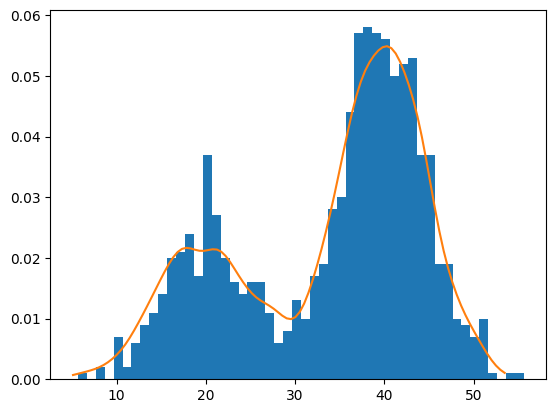

In [72]:
# plotting histogram
plt.hist(sample, bins=50,density=True)

# Plotting values, we can change the curve smoothness by changing the bandwidth
plt.plot(values[:],probabilities)
plt.show()